# 统计相关概念

## 单个变量相关的统计量

In [13]:
import numpy as np
import pandas as pd
from scipy import stats

In [14]:
house_price_gr = pd.read_csv("house_price_gr.csv",encoding= 'gbk')
house_price_gr.head(2)

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484


In [15]:
house_price_gr.shape

(150, 2)

### 均值

In [16]:
np.mean(house_price_gr.rate)

0.11006099670192315

### 方差
$$D(X)=\frac{\sum^n_{i=1}(X_i-\overline X)^2}{n-1}$$
其中n-1是自由度

In [17]:
house_price_gr.rate.var()

0.0017084240685060587

In [18]:
house_price_gr.rate.var(ddof=0)

0.0016970345747160183

In [19]:
((house_price_gr.rate - house_price_gr.rate.mean())**2).sum()/house_price_gr.rate.shape[0]

0.0016970345747160183

### 偏度
衡量是否对称。正态分布的偏度为0
$$S(x)=E[\frac{(X-\mu_x)^3}{\sigma_x^3}]$$

### 峰度
峰度越大，函数曲线越陡峭  
标准正态分布的峰度为3
$$K(x)=E[\frac{(X-\mu_x)^4}{\sigma_x^4}]$$
#### 超额峰度
超额峰度=峰度-标准正态分布的峰度  
超额峰度>0：说明函数曲线比标准正态分布曲线要陡峭

## 两个变量的统计量

### 协方差
$$cov(X,Y)=\frac{\sum_{i=1}^n(X_i-\overline X)(Y_i-\overline Y)}{n-1}$$

由公式可以看出，
* 当X_i>均值X and Y_i>均值Y时，协方差为正；
* 当X_i<均值X and Y_i<均值Y时，协方差为正；
* 当X_i>均值X and Y_i<均值Y时，协方差为负；
* 当X_i<均值X and Y_i>均值Y时，协方差为负；

而样本使得计算值时正时负，协方差互相抵消，趋近于0！

### 协方差矩阵C
* 矩阵的每个元素代表相应两个索引位置的变量的协方差。如C12表示变量1和变量2的协方差，而对角线上为相应变量的方差；
* 协方差矩阵为对称矩阵

In [1]:
import numpy as np
X = [[2, 0, -1.4],
[2.2, 0.2, -1.5],
[2.4, 0.1, -1],
[1.9, 0, -1.2]]
print(np.cov(np.array(X).T))

[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]


### 相关系数
可以理解为对协方差做归一化
$$\rho_{XY}=\frac{cov(X,Y)}{\sqrt{D(X)}\sqrt{D(Y)}}$$

In [2]:
np.corrcoef(np.array(X).T)

array([[ 1.        ,  0.66730837,  0.38983051],
       [ 0.66730837,  1.        , -0.27477404],
       [ 0.38983051, -0.27477404,  1.        ]])

## 其它统计量

### sem
（全称Standard Error of Mean）中文名标准误，是描述均数抽样分布的离散程度及衡量均数抽样误差大小的尺度。

标准误，即样本均数的标准差

标准误用来衡量抽样误差。标准误越小，表明样本统计量与总体参数的值越接近，样本对总体越有代表性，用样本统计量推断总体参数的可靠度越大。因此，标准误是统计推断可靠性的指标。

摘自：《白话统计》第9章标准误内容  
什么是标准误呢？我们还是从理论上先解释一下，这样更容易理解。  

已知某学校有初三学生共200名，这200名学生的平均身高为160cm.我们以这200名初三学生作为总体，欲通过抽样调查来了解所有初三学生的平均身高。现在假定我们共做了10次抽样，每次抽样量都是100人。此时我们可以分别计算出每次抽样样本的身高均数和标准差。可以得到10个均数和标准差。

这里10个均数和标准差都是样本统计量，如果我们把10个样本的均数作为原始数据，然后计算这10个值的标准差，那么我们得到的指标就是标准误。

也就是说，标准误是样本统计量的标准差，它反映了每次抽样样本之间的差异。如果标准小，则说明多次重复抽样得到的统计量差别不大，提示抽样误差小；反之，如果标准误大，则说明样本统计量之间差别较大，提示抽样误差较大。

不少初学者很容易混淆标准差和标准误，但其实仔细思考一下并不难理解。标准误和标准差的区别主要体现在以下几个方面：

* 第一，标准误的英文是standard Error，是一种误差；而标准差的英文是standard Deviation，只是一种对均数的偏离而已。偏离和误差根本不是一个概念。
* 第二，标准差只是一个描述性指标，只是描述原始数据的波动情况；而标准误是跟统计推断有关的指标。描述性指标和推断性指标根本不是一个层次上的概念。
* 第三，它们针对计算的对象不同。标准差是根据某次抽样的原始数据计算的；而标准误是根据多次抽样的样本统计量（如均数、率等）计算的。理论上，计算标准差只需要一个样本，而计算标准误需要多个样本。

尽管从理论上来讲，标准误的计算是通过多次抽样的多个样本统计量而获得的，但在实际中仅依靠一次抽样来计算标准误也是可行的。事实上，在绝大多数情况下，我们也别无选择，只能利用一次抽样数据来计算标准误。此时标准误的计算公式为：　　$Se=s/sqrt(n) $  （注：公式中分母sqrt(n)，是根号n的意思）

其中，s表示样本标准差，n为样本的例数。不难看出，样本例数越大，标准误越小，即抽样误差越小。

In [8]:
stats.sem(house_price_gr.rate) #样本均值的标准误

0.0033748324091783266

In [16]:
house_price_gr.rate.std()/np.sqrt(house_price_gr.rate.shape[0])

0.003374832409178327

# 概率论基础概念

## 随机变量——Random Variable
* 定义:设随机试验的样本空间为S={e}，X=X(e)是定义在样本空间S上的实值单值函数，称X=X(e)为随机变量

* 抛一颗骰子，用X记录得到的点数
* 将一颗硬币抛三次，用Y记录三次抛掷得到正面朝上的总数
* 对于明天的天气，用𝑍记录明天是否下雨 1，下雨  0，不下雨
* 以上的X、Y、Z都是随机变量——一个从样本空间映射到实数域的函数

### 通俗的理解什么是随机变量  
* 中心词是变量，说明其值是可变的  
* 随机，指这个变量的值是随机给出的，而不是人为赋值  
* 那么如何随机赋值呢？一般的，是在某一特定值域范围内按照某种概率来决定取值，
    * 如果值域是离散的，那么取值可以枚举，则每个值对应一个固定的取值概率，描述这些取值概率的东西称之为分布律  
    * 如果值域是连续的，那么用概率密度来描述在某个取值邻域内的概率，描述这些取值概率的东西称之为概率密度函数
    注意：概率密度函数并不能等同于分布律，分布律描述的是随机变量的某一取值对应的概率，而概率密度函数上的某点的取值则并不表示随机变量取该点的值的概率。因此，概率密度的值是可以大于1的！

### 离散or连续
对比X与Y的取值:
* 用X记录3月份下雨的天数，则X=0,1,2,3......31——X的值可以一一列出 
* 用Y记录3月份降雨量总和，则Y∈ [0, +∞)——Y的值不能一一列出

* 像X这种随机变量，叫做离散(Discrete)型随机变量
* 想Y这种随机变量，叫做连续(Continuous)型随机变量
* 离散型随机变量与连续型随机变量类比于自然数与实数

## 随机过程
随机过程，是依赖于参数的一组随机变量的全体，参数通常是时间。

通俗的讲，就是一个随机变量序列。

## 连续型随机变量
对于随机变量X的分布函数F(x)，存在非负可积函数f(x)，使对于任意实数x有
$$F(x)=int_{-\infty}^xf(t)dt$$
则称X为连续型随机变量，
### 概率密度函数(PDF, Probability Density Function)
f(x)称为X的概率密度函数( Probability Density Function )，简称概率密度(PDF)。

### 概率密度函数值可以大于1么？
可以。如均匀分布的PDF:1/(b-a)，如果b-a<1，概率密度函数是大于1的。

* 解释：  
连续型的在每点的概率都是0。通俗点解释吧：概率密度函数数值大仅仅代表取在该点及其临域内的可能性大一点（相比其他点），在教科书上其实非常常见：正态分布的极大值很容易超过1的。

## 分布函数CDF——Cumulative Distribution Function
对于连续型随机变量，由于其可能的取值不能一一列出，所以就不能像离散型随机变量 那样使用分布律去描述它。这时我们需要更加通用的描述方式——分布函数
* 设X是一个随机变量，x是任意实数，函数F(x)=P{X≤x}称为X的分布函数(累积分布函 数)(英文简写CDF)。

### 分布函数的性质:
* F(x)是一个不减函数。
* 0≤F(x)≤1
$$lim_{x->-\infty}F(x)=0\\im_{x->\infty}F(x)=1$$
* F(x)是右连续的。

# 离散型随机变量的分布

## (0-1)分布——the Bernoulli distribution
随机变量X只能取0和1的情况，我们称X服从以p为参数的(0-1)分布或是两点分布。

### 伯努利试验——Bernoulli trial
像上面提到的抛硬币，明天是否下雨等试验，可能结果只有两个:{正面向上，正面向下}与{明天下雨，明天不下雨}，我们称这一类试验为伯努利试验
* 刚出生的小孩是个女孩吗?
* 一个人的双眼是绿色的吗?

 一般情况下，我们将“是”的情况称为“成功”，“否”的情况称为“失败”。将“成 功”的概率记为p。
 当“成功”时，记随机变量X=1;当“失败”时，记随机变量X=0。P(X=1)=p，则X服 从以p为参数的(0-1)分布

### n重伯努利试验——Bernoulli process
 将一个伯努利试验独立地重复n次，称这一串重复的独立试验为n重伯努利试验


## 二项分布——Binomial distribution
在一个n重伯努利试验中，事件A(成功)发生的次数记为X，则X是一个随机变量，P(A)=p。
$$P(X=k)=C_n^kp^k(1-p)^{(n-k)}, k=0, 1,...,n$$

这时我们称X服从参数为n，p的二项分布。其分布律为
$$P(X=k)= \big(_k^n\big)p^k(1-p)^{(n-k)}$$
记为X~B(n,p)

特别地，当n=1时，二项分布就是(0-1)分布。

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import math
from scipy import stats
%matplotlib inline

[0.00097656 0.00976563 0.04394531 0.1171875  0.20507813 0.24609375
 0.20507813 0.1171875  0.04394531 0.00976563 0.00097656]
1.0000000000000009
0.04394531249999999


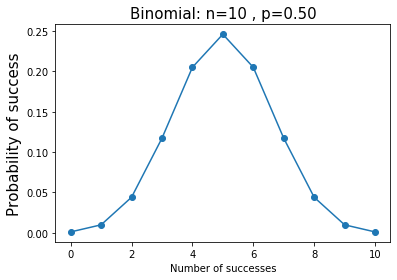

In [2]:
def test_binom_pmf():
    '''
    为离散分布
    二项分布的例子：抛掷10次硬币，恰好两次正面朝上的概率是多少？
    '''
    n = 10#独立实验次数
    p = 0.5#每次正面朝上概率
    k = np.arange(0,11)#0-10次正面朝上概率
    binomial = stats.binom.pmf(k,n,p)
    print(binomial)#概率和为1
    print(sum(binomial))
    print(binomial[2])

    plt.plot(k, binomial,'o-')
    plt.title('Binomial: n=%i , p=%.2f' % (n,p),fontsize=15)
    plt.xlabel('Number of successes')
    plt.ylabel('Probability of success',fontsize=15)
    plt.show()
test_binom_pmf()

10000
mean: 3.0086
SD: 1.44891


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


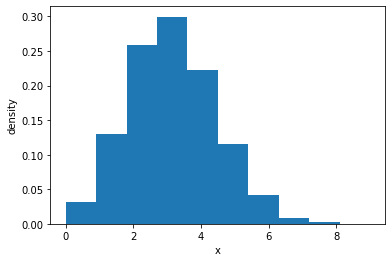

In [3]:
def test_binom_rvs():
    '''
    为离散分布
    使用.rvs函数模拟一个二项随机变量，其中参数size指定你要进行模拟的次数。我让Python返回10000个参数为n和p的二项式随机变量
    进行10000次实验，每次抛10次硬币，统计有几次正面朝上，最后统计每次实验正面朝上的次数
    '''
    binom_sim  = stats.binom.rvs(n=10,p=0.3,size=10000)
    print(len(binom_sim))
    print("mean: %g" % np.mean(binom_sim))
    print("SD: %g" % np.std(binom_sim,ddof=1))

    plt.hist(binom_sim,bins=10,normed=True)
    plt.xlabel('x')
    plt.ylabel('density')
    plt.show()
test_binom_rvs()

## 泊松分布——Poisson distribution
* 泊松定理
$$lim_{n->\infty}=\big(_k^n\big)p^k(1-p)^{(n-k)}=\frac{\lambda^ke^{-\lambda}}{k!}, 其中\lambda=np$$
* 泊松分布:设随机变量X的所有可能取值为0,1,2,......X的分布律为
$$P(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}, 其中\lambda \gt0是一个常数$$
则称X服从参数为λ的泊松分布，记为X~π(λ)
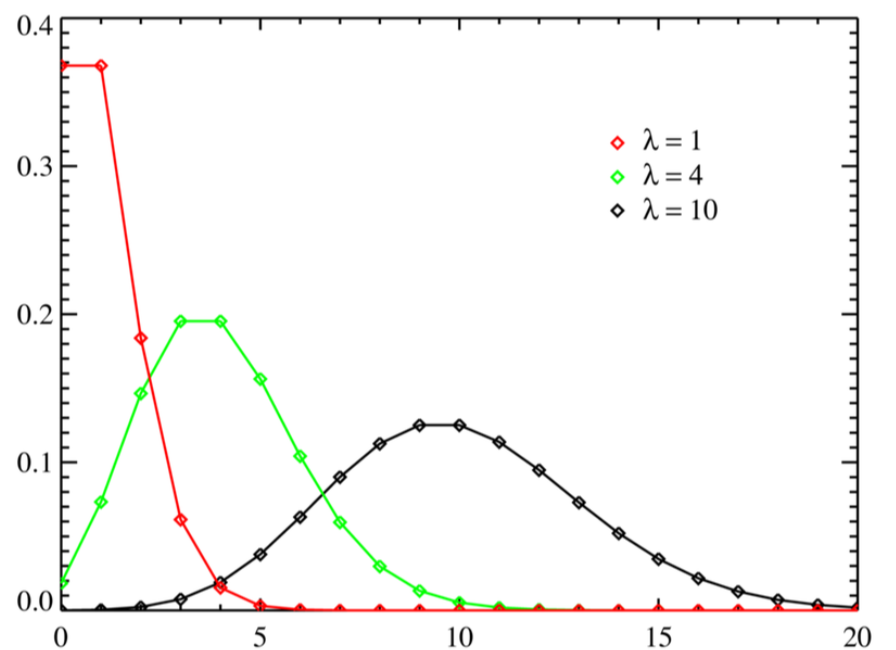

[1.35335283e-01 2.70670566e-01 2.70670566e-01 1.80447044e-01
 9.02235222e-02 3.60894089e-02 1.20298030e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04]


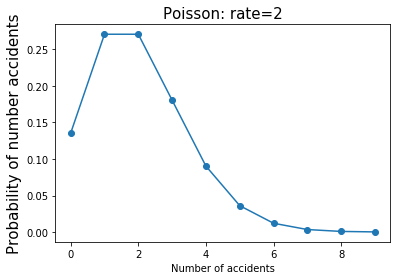

In [4]:
def test_poisson_pmf(rate=2):
    '''
    泊松分布的例子：已知某路口发生事故的比率是每天2次，那么在此处一天内发生4次事故的概率是多少？
    泊松分布的输出是一个数列，包含了发生0次、1次、2次，直到10次事故的概率。
    '''
    n = np.arange(0,10)
    y = stats.poisson.pmf(n,rate)
    print(y)
    plt.plot(n, y, 'o-')
    plt.title('Poisson: rate=%i' % (rate), fontsize=15)
    plt.xlabel('Number of accidents')
    plt.ylabel('Probability of number accidents', fontsize=15)
    plt.show()
test_poisson_pmf(2)

[0.01831564 0.07326256 0.14652511 0.19536681 0.19536681 0.15629345
 0.10419563 0.05954036 0.02977018 0.01323119]


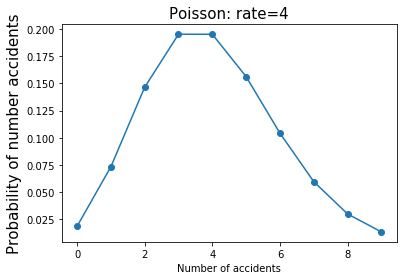

In [5]:
test_poisson_pmf(4)

[4.53999298e-05 4.53999298e-04 2.26999649e-03 7.56665496e-03
 1.89166374e-02 3.78332748e-02 6.30554580e-02 9.00792257e-02
 1.12599032e-01 1.25110036e-01]


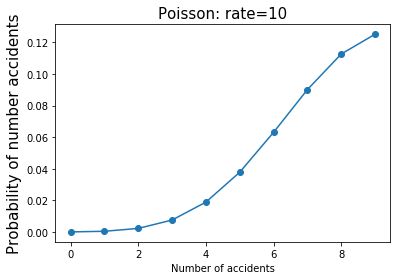

In [6]:
test_poisson_pmf(10)

mean: 2.059
SD: 1.45383
[ 2  2  6  3  8  7  7 11 12  9]


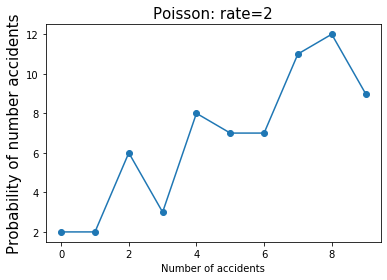

In [7]:
def test_poisson_rvs(mu=2, loc=0, size=1000):
    '''
    模拟1000个服从泊松分布的随机变量
    '''
    data = stats.poisson.rvs(mu, loc, size)
    print("mean: %g" % np.mean(data))
    print("SD: %g" % np.std(data, ddof=1))

    rate = 2
    n = np.arange(0,10)
    y = stats.poisson.rvs(n,rate)
    print(y)
    plt.plot(n, y, 'o-')
    plt.title('Poisson: rate=%i' % (rate), fontsize=15)
    plt.xlabel('Number of accidents')
    plt.ylabel('Probability of number accidents', fontsize=15)
    plt.show()
test_poisson_rvs()    

### 泊松分布近似二项分布
泊松分布的提出，是作为二项分布的一个近似。 
当p相当小(一般是p<=0.1)时，有近似公式 
$$\big(_k^n\big)p^k(1-p)^{(n-k)}\approx\frac{\lambda^ke^{-\lambda}}{k!}, 其中\lambda=np$$
* 实际应用场景:
* 1.社会生活，对服务的各种要求:某一医院在一天内的急诊病人数目，某一网站访问数，公共汽车站来到的乘客数等等
* 2.物理科学:放射性分裂落到某区域的质点数，热电子的发射等

# 连续性随机变量的常见分布

## 均匀分布——Uniform distribution
若连续函数X具有概率密度
$$f(x)=\begin{cases}\frac{1}{b-a}, a\lt x\lt b\\0, 其它\end{cases}$$
则称X在区间(a,b)上服从均匀分布，记为X~U(a,b)

## 正态分布——Normal distribution
若连续型随机变量X的概率密度为
$$f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}, -\infty<x<\infty$$
则称X服从参数为μ， 𝜎2的正态分布，记为X~N( μ, 𝜎2)

* 正态分布也称为高斯分布
* 当参数μ与𝜎 2 的取值不同，正态分布的概率密度函数图象也有所不同。 
* 其中， μ是位置参数，控制图象的对 称轴位置所在; 𝜎2是尺度参数，控 制钟型曲线的矮胖程度。 𝜎2越大，曲线越矮胖

[1.48671951e-06 2.43896075e-06 3.96129909e-06 6.36982518e-06
 1.01408521e-05 1.59837411e-05 2.49424713e-05 3.85351967e-05
 5.89430678e-05 8.92616572e-05 1.33830226e-04 1.98655471e-04
 2.91946926e-04 4.24780271e-04 6.11901930e-04 8.72682695e-04
 1.23221917e-03 1.72256894e-03 2.38408820e-03 3.26681906e-03
 4.43184841e-03 5.95253242e-03 7.91545158e-03 1.04209348e-02
 1.35829692e-02 1.75283005e-02 2.23945303e-02 2.83270377e-02
 3.54745928e-02 4.39835960e-02 5.39909665e-02 6.56158148e-02
 7.89501583e-02 9.40490774e-02 1.10920835e-01 1.29517596e-01
 1.49727466e-01 1.71368592e-01 1.94186055e-01 2.17852177e-01
 2.41970725e-01 2.66085250e-01 2.89691553e-01 3.12253933e-01
 3.33224603e-01 3.52065327e-01 3.68270140e-01 3.81387815e-01
 3.91042694e-01 3.96952547e-01 3.98942280e-01 3.96952547e-01
 3.91042694e-01 3.81387815e-01 3.68270140e-01 3.52065327e-01
 3.33224603e-01 3.12253933e-01 2.89691553e-01 2.66085250e-01
 2.41970725e-01 2.17852177e-01 1.94186055e-01 1.71368592e-01
 1.49727466e-01 1.295175

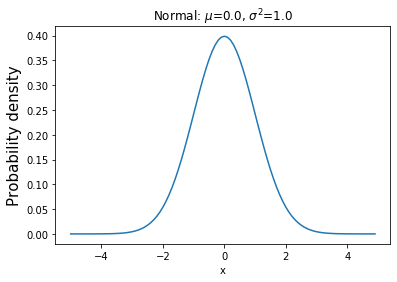

In [8]:
def test_norm_pmf():
    '''
    正态分布是一种连续分布，其函数可以在实线上的任何地方取值。
    正态分布由两个参数描述：分布的平均值μ和方差σ2 。
    '''
    mu = 0#mean
    sigma = 1#standard deviation
    x = np.arange(-5,5,0.1)
    y = stats.norm.pdf(x,0,1)
    print(y)
    plt.plot(x, y)
    plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu,sigma))
    plt.xlabel('x')
    plt.ylabel('Probability density', fontsize=15)
    plt.show()
test_norm_pmf()

### 标准正态分布
当𝜇=0，𝜎2=1时，称X服从标准正态分布，其概率密度和分布函数分布用$\phi(𝑥)$，Φ(𝑥)表示。
$$\phi(x)=\frac{1}{\sqrt(2\pi)}e{-\frac{x^2}{2}}$$
* 在标准正态分布中，随机变量X落 (-1,1)的概率是68.3%
* 对于标准正态分布，人们已经编制了Φ(𝑥)的函数表，可以直接查表求特定值

### 正态分布→标准正态分布
* 对于一般正态分布，可以变换变为标准正态分布 
* 若X~N(μ, 𝜎2)，则
$$Z=\frac{X-\mu}{\sigma}\sim 𝑁(0,1)$$

### 二项分布与正态分布
* 二项分布是离散情况下的正态分布。
* 当n足够大时，可以用正态分布近似二项分布，从而避免二项分布中繁杂的计算。 
* 若X~B(n,p)，当n足够大时，有X近似服从正态分布N(np,np(1-p))

## beta分布

In [9]:
def test_beta_pmf():
    '''
    β分布是一个取值在 [0, 1] 之间的连续分布，它由两个形态参数α和β的取值所刻画。
    β分布的形状取决于α和β的值。贝叶斯分析中大量使用了β分布。
    '''
    a = 0.1#
    b = 0.8
    x = np.arange(0.01,1,0.01)
    y = stats.norm.pdf(x,a,b)
    print(y)
    plt.plot(x, y)
    plt.title('Beta: a=%.1f, b=%.1f' % (a,b))
    plt.xlabel('x')
    plt.ylabel('Probability density', fontsize=15)
    plt.show()

[0.49553212 0.49619068 0.4967725  0.49727729 0.49770482 0.49805489
 0.49832734 0.49852204 0.49863889 0.49867785 0.49863889 0.49852204
 0.49832734 0.49805489 0.49770482 0.49727729 0.4967725  0.49619068
 0.49553212 0.49479711 0.493986   0.49309916 0.49213702 0.49110001
 0.48998862 0.48880337 0.48754479 0.48621349 0.48481005 0.48333515
 0.48178944 0.48017364 0.4784885  0.47673477 0.47491326 0.47302479
 0.47107022 0.46905043 0.46696634 0.46481887 0.46260898 0.46033768
 0.45800595 0.45561484 0.4531654  0.4506587  0.44809586 0.44547797
 0.44280619 0.44008166 0.43730556 0.43447908 0.43160343 0.42867982
 0.42570949 0.4226937  0.41963369 0.41653075 0.41338616 0.41020121
 0.4069772  0.40371545 0.40041727 0.39708398 0.39371692 0.39031742
 0.38688681 0.38342644 0.37993765 0.37642179 0.37288019 0.36931421
 0.36572518 0.36211444 0.35848333 0.35483319 0.35116534 0.34748111
 0.34378181 0.34006875 0.33634324 0.33260656 0.32886001 0.32510487
 0.32134238 0.31757382 0.31380042 0.31002341 0.306244   0.3024

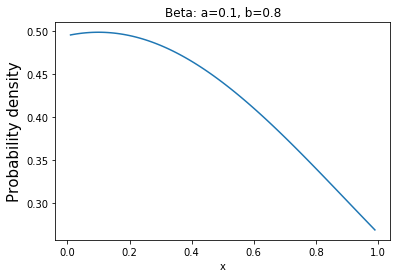

In [10]:
test_beta_pmf()

## 指数分布（Exponential Distribution）

[5.00000000e-01 4.75614712e-01 4.52418709e-01 4.30353988e-01
 4.09365377e-01 3.89400392e-01 3.70409110e-01 3.52344045e-01
 3.35160023e-01 3.18814076e-01 3.03265330e-01 2.88474905e-01
 2.74405818e-01 2.61022888e-01 2.48292652e-01 2.36183276e-01
 2.24664482e-01 2.13707466e-01 2.03284830e-01 1.93370512e-01
 1.83939721e-01 1.74968875e-01 1.66435542e-01 1.58318385e-01
 1.50597106e-01 1.43252398e-01 1.36265897e-01 1.29620130e-01
 1.23298482e-01 1.17285144e-01 1.11565080e-01 1.06123987e-01
 1.00948259e-01 9.60249543e-02 9.13417620e-02 8.68869717e-02
 8.26494441e-02 7.86185832e-02 7.47843096e-02 7.11370358e-02
 6.76676416e-02 6.43674518e-02 6.12282141e-02 5.82420789e-02
 5.54015792e-02 5.26996123e-02 5.01294219e-02 4.76845811e-02
 4.53589766e-02 4.31467932e-02 4.10424993e-02 3.90408330e-02
 3.71367891e-02 3.53256065e-02 3.36027564e-02 3.19639306e-02
 3.04050313e-02 2.89221604e-02 2.75116100e-02 2.61698530e-02
 2.48935342e-02 2.36794622e-02 2.25246012e-02 2.14260634e-02
 2.03811020e-02 1.938710

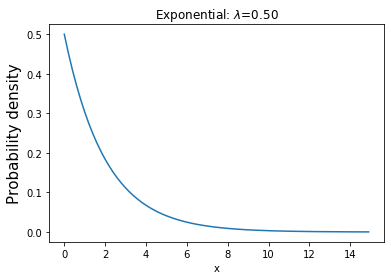

In [11]:
def test_exp():
    '''
    指数分布是一种连续概率分布，用于表示独立随机事件发生的时间间隔。
    比如旅客进入机场的时间间隔、打进客服中心电话的时间间隔、中文维基百科新条目出现的时间间隔等等。
    '''
    lambd = 0.5#
    x = np.arange(0,15,0.1)
    y =lambd * np.exp(-lambd *x)
    print(y)
    plt.plot(x, y)
    plt.title('Exponential: $\lambda$=%.2f' % (lambd))
    plt.xlabel('x')
    plt.ylabel('Probability density', fontsize=15)
    plt.show()
test_exp()

mean: 1.96726
SD: 1.98027


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


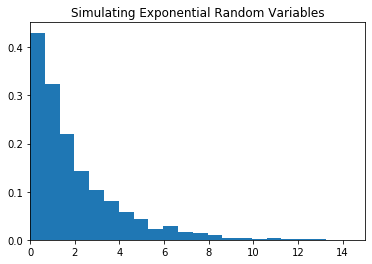

In [12]:
def test_expon_rvs():
    '''
    指数分布下模拟1000个随机变量。scale参数表示λ的倒数。函数np.std中，参数ddof等于标准偏差除以 $n-1$ 的值。
    '''
    data = stats.expon.rvs(scale=2, size=1000)
    print("mean: %g" % np.mean(data))
    print("SD: %g" % np.std(data, ddof=1))

    plt.hist(data, bins=20, normed=True)
    plt.xlim(0,15)
    plt.title('Simulating Exponential Random Variables')
    plt.show()
test_expon_rvs()

# 参数估计

## 区间估计

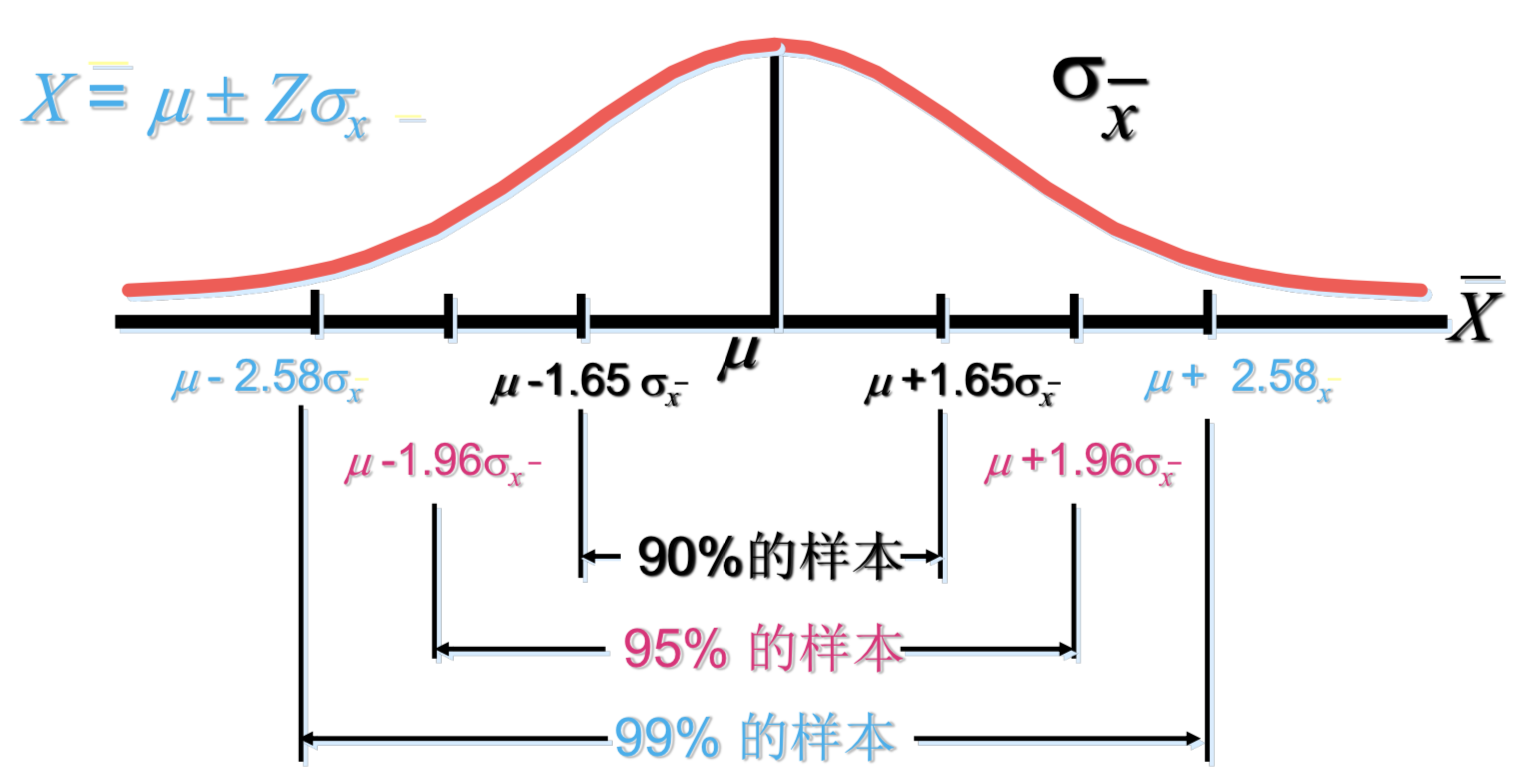

In [27]:
# 进行区间估计
se = stats.sem(house_price_gr.rate)
LB = house_price_gr.rate.mean()  - 1.96*se
UB = house_price_gr.rate.mean()  + 1.96*se
print (LB,UB)

0.10344632517993363 0.11667566822391268


In [28]:
stats.t.interval(0.95, house_price_gr.rate.shape[0]-1, house_price_gr.rate.mean(), stats.sem(house_price_gr.rate))

(0.10339228338892809, 0.11672971001491822)

### 上证指数的收益率

In [9]:
#读取数据
SHindex = pd.read_csv("TRD_Index.csv")
SHindex.head(2)

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2014/1/2,4,2112.126,2113.110,2101.016,2109.387,-0.003115
1,1,2014/1/3,5,2101.542,2102.167,2075.899,2083.136,-0.012445


In [10]:
mu = SHindex.Retindex.mean()
sigma =  SHindex.Retindex.std()
#计算区间
stats.t.interval(0.95,len(SHindex)-1,mu,stats.sem(SHindex.Retindex))

(0.0017279978716816238, 0.0024700651508264178)

# 假设检验

p值：  
P值即概率，反映某一事件发生的可能性大小。统计学根据显著性检验方法所得到的P 值，一般以P < 0.05 为有统计学差异， P<0.01 为有显著统计学差异，P<0.001为有极其显著的统计学差异。其含义是样本间的差异由抽样误差所致的概率小于0.05 、0.01、0.001。

自由度：  
构成样本统计量的独立的样本观测值的数目或自由变动的样本观测值的数目。用df表示。

## 正态性检验
检验样本是否服从正态分布

### 基于偏度和峰度的检验
可用于检验样本数据是否来自正态分布（偏度=0，峰度=3），易受异常值影响，不能用于小样本。

偏度检验：H0 : 样本数据的偏度=0   H1 :样本数据的偏度≠0

拒绝原假设则认为样本数据不是来自正态总体，但不拒绝原假设不能说明样本数据来自正态总体，只能说明数据对称，只有在确定对称性是影响分布的形态的唯一因素时，偏度检验才适用。

峰度检验：H0 : 样本数据的峰度=3   H1 :样本数据的峰度≠3

拒绝原假设则认为样本数据不是来自正态总体，但不拒绝原假设不能说明样本数据来自正态总体，容易出错不推荐使用。


### 夏皮罗维尔克检验(Shapiro-Wilk test)（一般配合QQ图）
一般先用QQ图观察一下，再用这个检验一下。

https://blog.csdn.net/lvsehaiyang1993/article/details/80473265

该检验的零检验是样本x1,⋯,xn来自于一个正态分布的母体。

这个统计检验的假设是样本来自于一个正态母体，
因此，一方面，如果p值小于选择的显著度水平（α值 通常0.05），那么在更大概率下我们应该拒绝零假设，数据的证据显示我们的样本不是来自一个正态分布母体。另一方面，如果p值比选择的显著度水平大，那么我们没有证据拒绝零假设，数据来自于一个正态分布。（举个栗子，如果p值是0.05，同时选择的显著度水平是0.05，那么应该拒绝零假设，数据来自与一个正态分布母体。）
和大多数统计学显著性测试一样，如果样本空间足够大，那么该检验可以发现零假设的每一个细节。（即虽然这里可能有统计显著性效用，但它实在太小而不可能是任何一个实际的统计显著性。）因此，通常建议做额外的效果因子调查，例如，这种情况下的一个Q-Q图。

In [20]:
##生成40个服从N（2,1）的随机数
import numpy as np
np.random.seed(0)
mu = 2 ; sigma = 1; sampleNo = 40;
testData = np.random.normal(mu, sigma, sampleNo)

In [22]:
testData

array([ 3.76405235,  2.40015721,  2.97873798,  4.2408932 ,  3.86755799,
        1.02272212,  2.95008842,  1.84864279,  1.89678115,  2.4105985 ,
        2.14404357,  3.45427351,  2.76103773,  2.12167502,  2.44386323,
        2.33367433,  3.49407907,  1.79484174,  2.3130677 ,  1.14590426,
       -0.55298982,  2.6536186 ,  2.8644362 ,  1.25783498,  4.26975462,
        0.54563433,  2.04575852,  1.81281615,  3.53277921,  3.46935877,
        2.15494743,  2.37816252,  1.11221425,  0.01920353,  1.65208785,
        2.15634897,  3.23029068,  3.20237985,  1.61267318,  1.69769725])

In [21]:
##利用Shapiro-Wilk test检验其是否服从正态分布
import scipy.stats as stats
stats.shapiro(testData)

(0.9782676696777344, 0.6254296898841858)

输出（统计量W的值,P值）=(0.9782678484916687, 0.6254357695579529)
* W的值越接近1就越表明数据和正态分布拟合得越好，
* P值>指定水平,不拒绝原假设，可以认为样本数据服从正态分布

## t检验
T检验是假设检验的一种，又叫student t检验（Student’s t test），主要用于样本含量较小（例如n<30），总体标准差σ未知的正态分布资料。 

T检验用于检验两个总体的均值差异是否显著。

In [24]:
import statsmodels.api as sm
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
#假设为样本的均值为0.1
print('t检验= %6.4f,p-value=%6.4f, df=%s' % d1.ttest_mean(0.1))

t检验= 2.9812,p-value=0.0034, df=149.0


p值小于0.05，原假设（样本的均值为0.1）被拒绝，

In [25]:
print('t检验= %6.4f,p-value=%6.4f, df=%s' % d1.ttest_mean(0.11))

t检验= 0.0181,p-value=0.9856, df=149.0


## 双样本t检验
双样本t检验在于检验两个样本均值的差异是否显著，在数据分析中，双样本t检验往往用于检验某二分类变 量区分下的连续型变量是否有显著差异。

例如研究信用卡的消费中，男女消费是否有显著差异

In [42]:
#读取数据
# 研究信用卡消费和性别的关系
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
creditcard_exp  = creditcard_exp.dropna(how = 'any')
creditcard_exp['avg_exp'].groupby(creditcard_exp['gender']).describe().T


#先进性方差齐性检验
gender0 = creditcard_exp[creditcard_exp['gender'] ==0]['avg_exp']
gender1 = creditcard_exp[creditcard_exp['gender'] ==1]['avg_exp']
leveneTestRes = stats.levene(gender0,gender1,center='median')
print('w-value=%6.4f,p-value=%6.4f' % leveneTestRes)

#进行双样本t检验
stats.stats.ttest_ind(gender0, gender1,equal_var=True)

w-value=0.0683,p-value=0.7946


Ttest_indResult(statistic=-1.742901386808629, pvalue=0.08587122878448449)

## 方差分析
方差分析用于检验多个样本的均值是否有显著性差异，所以其用于分析多于两个分类的分类变量与连续 变量的关系，例如不同教育程度的人收入水平是否有显著影响。

单因素方差分析   
衡量不同因素对观测变量的影响程度，在数据分析中，不同因素可以理解为一个变量取不同值时对观测
变量的影响，例如收入水平是否受教育程度的影响，不同行业的股票收益率是否有显著差异 
多因素方差分析  
  考虑的是多个分类变量对连续变量的影响，以及分类变量之间的交互效应，例如在考虑股票收益率与行
业和地区的关系时，还要考虑行业和地区的交互效应。

### 单因素方差分析

In [12]:
# 研究不同行业股票收益率水平
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
year_return = pd.read_csv('TRD_Year.csv',encoding= 'gbk')
model = ols('Return ~Industry',data =year_return.dropna()).fit()
print(anova_lm(model))

              df      sum_sq   mean_sq         F        PR(>F)
Industry    74.0   60.517228  0.817800  4.177614  4.382045e-28
Residual  2302.0  450.634318  0.195758       NaN           NaN


### 多因素方差分析

In [13]:
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
ana = ols('avg_exp ~ C(edu_class) + C (gender)', data = creditcard_exp).fit()
anova_lm(ana)
ana.summary()
#添加交互项

ana1 = ols('avg_exp ~ C(edu_class) + C (gender) + C(edu_class)*C(gender)', data = creditcard_exp).fit()
anova_lm(ana1)
ana1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     18.12
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           4.35e-12
Time:                        20:09:40   Log-Likelihood:                -490.80
No. Observations:                  70   AIC:                             995.6
Df Residuals:                      63   BIC:                             1011.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          207.3700    200.057      1.037      0.304    -192.412     607.152
C(edu_class)[T.1]                  417.8090    209.367      1.996      0.050      -0.577     836.195
C(edu_class)[T.2]                  732.2613    212.977      3.438      0.001     306.661    1157.861
C(edu_class)[T.3]                 1346.5708    216.086      6.232      0.000     914.757    1778.384
C(gender)[T.1]                      -0.0168     67.939     -0.000      1.000    -135.782     135.749
C(edu_class)[T.1]:C(gender)[T.1]   192.7428    162.889      1.183      0.241    -132.765     518.251
C(edu_class)[T.2]:C(gender)[T.1]    96.8755    110.846      0.874      0.385    -124.632     318.383
C(edu_class)[T.3]:C(gender)[T.1]  -289.6350    109.331     -2.649      0.010    -508.115     -71.155
==============================================================================
Omnibus:                       35.697   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.497
Skew:                           1.590   Prob(JB):                     4.09e-22
Kurtosis:                       7.864   Cond. No.                     3.39e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.91e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 相关分析

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


           Income   avg_exp
Income   1.000000  0.674011
avg_exp  0.674011  1.000000
           Income   avg_exp
Income   1.000000  0.707917
avg_exp  0.707917  1.000000
           Income   avg_exp
Income   1.000000  0.525466
avg_exp  0.525466  1.000000


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  def _findfont_cached(self, prop, fontext, directory, fallback_to_default,
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  def _findfont_cached(self, prop, fontext, directory, fallback_to_default,
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass


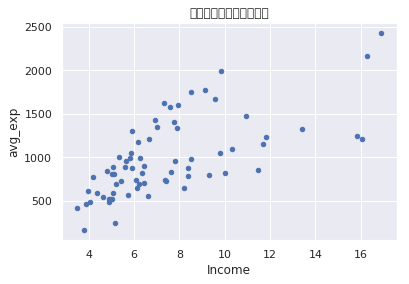

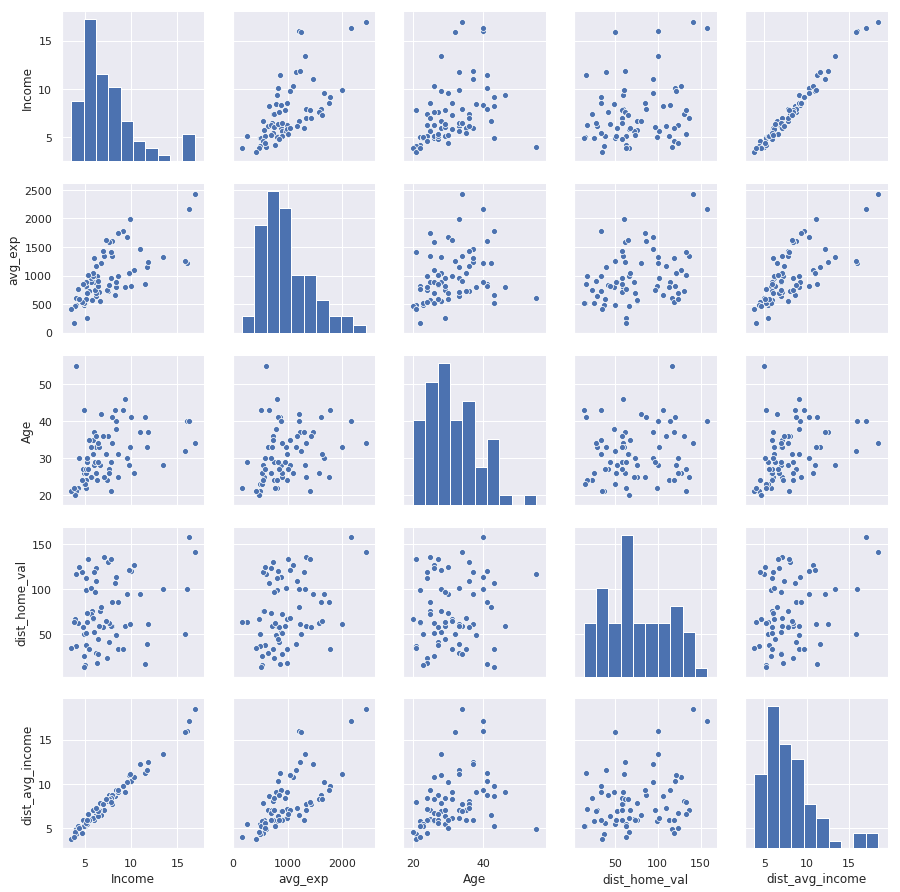

In [46]:
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
#画图
import matplotlib.pyplot as plt

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

creditcard_exp.plot(x= 'Income',y='avg_exp',kind='scatter',title='收入与信用卡支出散点图')
plt.show()
#%%
#计算相关系数
print(creditcard_exp[['Income','avg_exp']].corr(method='pearson'))
print(creditcard_exp[['Income','avg_exp']].corr(method='spearman'))
print(creditcard_exp[['Income','avg_exp']].corr(method='kendall'))
#%%

#画散点图
import seaborn as sns
creditcard_exp1 = creditcard_exp.dropna()
sns.pairplot(creditcard_exp1[['Income','avg_exp','Age','dist_home_val','dist_avg_income']],size =2.5)
plt.show()

## 卡方检验
卡方检验主要检验的是两个分类变量是否相关,不能表示强弱

In [47]:
#列联表分析
#读取数据
accepts = pd.read_csv('accepts.csv')
cross_table = pd.crosstab(accepts.bankruptcy_ind,columns=accepts.bad_ind,margins=True)
cross_table_rowpct = cross_table.div(cross_table['All'],axis=0)

#卡方检验
stats.chi2_contingency(cross_table)

(2.9166670832184227,
 0.5718664217239144,
 4,
 array([[4149.15422886, 1030.84577114, 5180.        ],
        [ 358.84577114,   89.15422886,  448.        ],
        [4508.        , 1120.        , 5628.        ]]))

# 假设检验

p值：  
P值即概率，反映某一事件发生的可能性大小。统计学根据显著性检验方法所得到的P 值，一般以P < 0.05 为有统计学差异， P<0.01 为有显著统计学差异，P<0.001为有极其显著的统计学差异。其含义是样本间的差异由抽样误差所致的概率小于0.05 、0.01、0.001。

自由度：  
构成样本统计量的独立的样本观测值的数目或自由变动的样本观测值的数目。用df表示。

## t检验
T检验是假设检验的一种，又叫student t检验（Student’s t test），主要用于样本含量较小（例如n<30），总体标准差σ未知的正态分布资料。 

T检验用于检验两个总体的均值差异是否显著。

In [24]:
import statsmodels.api as sm
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
#假设为样本的均值为0.1
print('t检验= %6.4f,p-value=%6.4f, df=%s' % d1.ttest_mean(0.1))

t检验= 2.9812,p-value=0.0034, df=149.0


p值小于0.05，原假设（样本的均值为0.1）被拒绝，

In [25]:
print('t检验= %6.4f,p-value=%6.4f, df=%s' % d1.ttest_mean(0.11))

t检验= 0.0181,p-value=0.9856, df=149.0


## 双样本t检验
双样本t检验在于检验两个样本均值的差异是否显著，在数据分析中，双样本t检验往往用于检验某二分类变 量区分下的连续型变量是否有显著差异。

例如研究信用卡的消费中，男女消费是否有显著差异

In [42]:
#读取数据
# 研究信用卡消费和性别的关系
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
creditcard_exp  = creditcard_exp.dropna(how = 'any')
creditcard_exp['avg_exp'].groupby(creditcard_exp['gender']).describe().T


#先进性方差齐性检验
gender0 = creditcard_exp[creditcard_exp['gender'] ==0]['avg_exp']
gender1 = creditcard_exp[creditcard_exp['gender'] ==1]['avg_exp']
leveneTestRes = stats.levene(gender0,gender1,center='median')
print('w-value=%6.4f,p-value=%6.4f' % leveneTestRes)

#进行双样本t检验
stats.stats.ttest_ind(gender0, gender1,equal_var=True)

w-value=0.0683,p-value=0.7946


Ttest_indResult(statistic=-1.742901386808629, pvalue=0.08587122878448449)

## 方差分析
方差分析用于检验多个样本的均值是否有显著性差异，所以其用于分析多于两个分类的分类变量与连续 变量的关系，例如不同教育程度的人收入水平是否有显著影响。

单因素方差分析   
衡量不同因素对观测变量的影响程度，在数据分析中，不同因素可以理解为一个变量取不同值时对观测
变量的影响，例如收入水平是否受教育程度的影响，不同行业的股票收益率是否有显著差异 
多因素方差分析  
  考虑的是多个分类变量对连续变量的影响，以及分类变量之间的交互效应，例如在考虑股票收益率与行
业和地区的关系时，还要考虑行业和地区的交互效应。

### 单因素方差分析

In [12]:
# 研究不同行业股票收益率水平
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
year_return = pd.read_csv('TRD_Year.csv',encoding= 'gbk')
model = ols('Return ~Industry',data =year_return.dropna()).fit()
print(anova_lm(model))

              df      sum_sq   mean_sq         F        PR(>F)
Industry    74.0   60.517228  0.817800  4.177614  4.382045e-28
Residual  2302.0  450.634318  0.195758       NaN           NaN


### 多因素方差分析

In [13]:
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
ana = ols('avg_exp ~ C(edu_class) + C (gender)', data = creditcard_exp).fit()
anova_lm(ana)
ana.summary()
#添加交互项

ana1 = ols('avg_exp ~ C(edu_class) + C (gender) + C(edu_class)*C(gender)', data = creditcard_exp).fit()
anova_lm(ana1)
ana1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     18.12
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           4.35e-12
Time:                        20:09:40   Log-Likelihood:                -490.80
No. Observations:                  70   AIC:                             995.6
Df Residuals:                      63   BIC:                             1011.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          207.3700    200.057      1.037      0.304    -192.412     607.152
C(edu_class)[T.1]                  417.8090    209.367      1.996      0.050      -0.577     836.195
C(edu_class)[T.2]                  732.2613    212.977      3.438      0.001     306.661    1157.861
C(edu_class)[T.3]                 1346.5708    216.086      6.232      0.000     914.757    1778.384
C(gender)[T.1]                      -0.0168     67.939     -0.000      1.000    -135.782     135.749
C(edu_class)[T.1]:C(gender)[T.1]   192.7428    162.889      1.183      0.241    -132.765     518.251
C(edu_class)[T.2]:C(gender)[T.1]    96.8755    110.846      0.874      0.385    -124.632     318.383
C(edu_class)[T.3]:C(gender)[T.1]  -289.6350    109.331     -2.649      0.010    -508.115     -71.155
==============================================================================
Omnibus:                       35.697   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.497
Skew:                           1.590   Prob(JB):                     4.09e-22
Kurtosis:                       7.864   Cond. No.                     3.39e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.91e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 相关分析

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


           Income   avg_exp
Income   1.000000  0.674011
avg_exp  0.674011  1.000000
           Income   avg_exp
Income   1.000000  0.707917
avg_exp  0.707917  1.000000
           Income   avg_exp
Income   1.000000  0.525466
avg_exp  0.525466  1.000000


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  def _findfont_cached(self, prop, fontext, directory, fallback_to_default,
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  def _findfont_cached(self, prop, fontext, directory, fallback_to_default,
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass


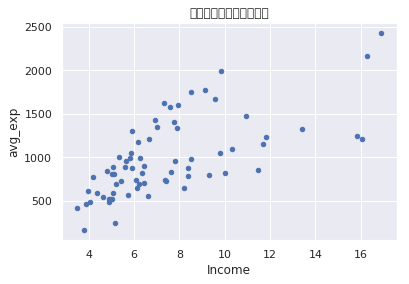

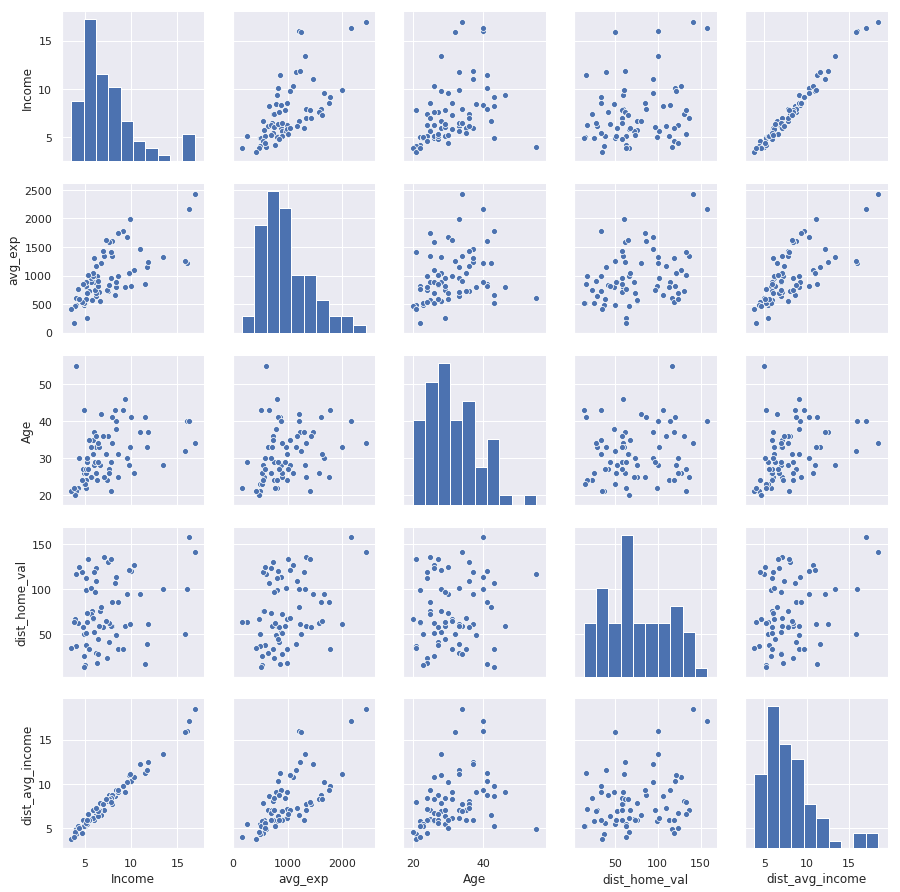

In [46]:
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
#画图
import matplotlib.pyplot as plt

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

creditcard_exp.plot(x= 'Income',y='avg_exp',kind='scatter',title='收入与信用卡支出散点图')
plt.show()
#%%
#计算相关系数
print(creditcard_exp[['Income','avg_exp']].corr(method='pearson'))
print(creditcard_exp[['Income','avg_exp']].corr(method='spearman'))
print(creditcard_exp[['Income','avg_exp']].corr(method='kendall'))
#%%

#画散点图
import seaborn as sns
creditcard_exp1 = creditcard_exp.dropna()
sns.pairplot(creditcard_exp1[['Income','avg_exp','Age','dist_home_val','dist_avg_income']],size =2.5)
plt.show()

## 卡方检验
卡方检验主要检验的是两个分类变量是否相关,不能表示强弱

In [47]:
#列联表分析
#读取数据
accepts = pd.read_csv('accepts.csv')
cross_table = pd.crosstab(accepts.bankruptcy_ind,columns=accepts.bad_ind,margins=True)
cross_table_rowpct = cross_table.div(cross_table['All'],axis=0)

#卡方检验
stats.chi2_contingency(cross_table)

(2.9166670832184227,
 0.5718664217239144,
 4,
 array([[4149.15422886, 1030.84577114, 5180.        ],
        [ 358.84577114,   89.15422886,  448.        ],
        [4508.        , 1120.        , 5628.        ]]))